Iris Çano

Data Science

Project 2- Linear Motion

2/12/23

# Part 1
Using the linear accelerometer sensor, conduct some data collection experiments in your group. At minimum, be sure to include the following:
Measurement: Use your phone and the linear accelerometer data to measure how tall someone in your group is, give their name and actual height. 

Data management: Describe the app used and the process of getting the data from the phone to your Jupyter environment

Data wrangling: Explain what you did to adjust, clean, and otherwise prepare the data for the analysis

Visualization: Use matplotlib to visualize the acceleration, velocity and position data, describe the graph and whether it seems to make sense

Analysis: Use numpy.cumsum() to analyze the data, describe how this is akin to integration, connect to the ideas of acceleration, velocity and position that you learned in calculus

Analysis: Use the acceleration data to determine how far your phone traveled during the linear motion. Do all of the measurements from the different phones agree?

Additional analysis: Include an above & beyond element in your write-up

In [3]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
height1= pd.read_csv('A height 1.csv')
height2= pd.read_csv('A Height 2.csv')
height3= pd.read_csv('A Height 3.1.csv')
# Imports/reads and converts all measurement data into data frames for anaylsis.

In [3]:
height1.head()

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2)
0,0.002174,-0.0659,-0.0317,-0.0036,0.073
1,0.004631,-0.0229,-0.0074,-0.0730,0.077
2,0.013049,0.0263,-0.0378,0.0036,0.046
3,0.020658,0.0305,-0.0292,-0.0515,0.067
4,0.028815,0.0130,0.0322,-0.0755,0.083


In [4]:
height2.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.006469,-0.053707,-0.023127,-0.041767,0.071859
1,0.016526,-0.063557,-0.025577,-0.057485,0.089433
2,0.026584,-0.061033,-0.011483,-0.041920,0.074927
3,0.036641,-0.055774,-0.009183,-0.037879,0.068043
4,0.046698,-0.071056,-0.014492,-0.046113,0.085938


In [5]:
height3.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.004158,-0.016362,-0.051115,0.100465,0.113902
1,0.014164,0.051135,0.155001,0.435241,0.464838
2,0.024170,0.040714,0.016094,0.227653,0.231824
3,0.034176,0.015620,-0.004917,0.099105,0.100449
4,0.044183,0.154263,0.118104,0.220846,0.294140


In [6]:
#One measurement used the Physics Toolbox Suite, and the other two used PhyPhox. All apps recorded linear acceleration data
#   measuring height. 
# Iris Çano was measured, she is actually 5'7"
#to get the data to the jupyter notebook, the files were all uploaded to google drive, and from there, uploaded in a folder
#   with the jupyter notebook. 

In [7]:
#First measurement:

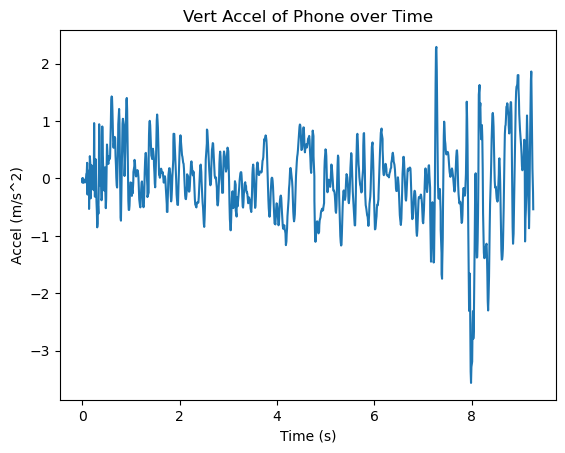

In [8]:
#height1.plot(y='az (m/s^2)')
plt.plot(height1['time'], height1['az (m/s^2)'])
plt.xlabel('Time (s)')
plt.ylabel('Accel (m/s^2)')
plt.title('Vert Accel of Phone over Time')

plt.show()

# This plot uses the vertical acceleration column that was automatically made in the dataframe. 

In [9]:
z_baseline1= height1['az (m/s^2)'].iloc[:10].mean()
z_baseline1

# Calculating and subtracting out the baseline for this data helps clean and adjust the data, by accounting for the fact
#     that it probably didn't start at exactly 0. 

-0.03889

In [10]:
height1['accel_z']= height1['az (m/s^2)']- z_baseline1
height1

# A new column representing the adjusted acceleration values was added to the dataframe.

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2),accel_z
0,0.002174,-0.0659,-0.0317,-0.0036,0.073,0.03529
1,0.004631,-0.0229,-0.0074,-0.0730,0.077,-0.03411
2,0.013049,0.0263,-0.0378,0.0036,0.046,0.04249
3,0.020658,0.0305,-0.0292,-0.0515,0.067,-0.01261
4,0.028815,0.0130,0.0322,-0.0755,0.083,-0.03661
...,...,...,...,...,...,...
1156,9.233690,0.3607,-0.5339,1.2638,1.419,1.30269
1157,9.241712,0.3300,-0.5309,0.6563,0.906,0.69519
1158,9.249670,0.1458,-0.6738,0.1684,0.710,0.20729
1159,9.261662,-0.1298,-0.7891,-0.2442,0.836,-0.20531


In [11]:
height1['time'].iloc[-1]

9.265751

In [12]:
#calculate dt (the change in time/ interval of elapsed time. To be used in calculations later.)

dt1=height1['time'].iloc[-1]/height1.shape[0]
dt1

0.007980836347975882

In [13]:
#calculate velocity
height1['z_vel_ms']=height1['accel_z'].cumsum()*dt1
height1

#By definition of integration as a summation function, we can find velocity by adding all values of acceleration at
#     all points. Then knowing velocity, we can integrate it to find the position of the phone as velocity is the change of
#          position over time. 

# Another new column is calculated by "integrating" acceleration to get velocity values. 

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2),accel_z,z_vel_ms
0,0.002174,-0.0659,-0.0317,-0.0036,0.073,0.03529,0.000282
1,0.004631,-0.0229,-0.0074,-0.0730,0.077,-0.03411,0.000009
2,0.013049,0.0263,-0.0378,0.0036,0.046,0.04249,0.000349
3,0.020658,0.0305,-0.0292,-0.0515,0.067,-0.01261,0.000248
4,0.028815,0.0130,0.0322,-0.0755,0.083,-0.03661,-0.000044
...,...,...,...,...,...,...,...
1156,9.233690,0.3607,-0.5339,1.2638,1.419,1.30269,-0.065526
1157,9.241712,0.3300,-0.5309,0.6563,0.906,0.69519,-0.059978
1158,9.249670,0.1458,-0.6738,0.1684,0.710,0.20729,-0.058324
1159,9.261662,-0.1298,-0.7891,-0.2442,0.836,-0.20531,-0.059962


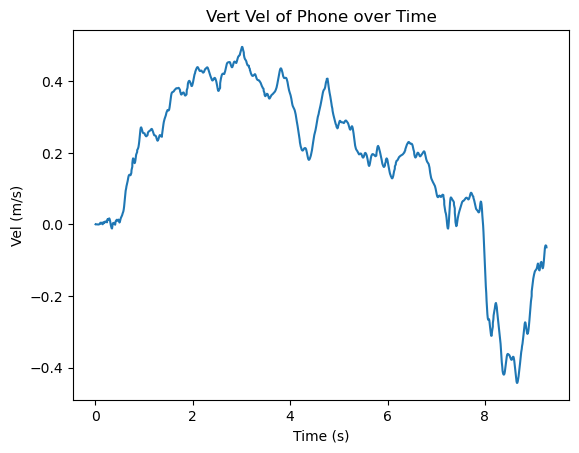

In [14]:
#height1.plot(y='z_vel_ms')
plt.plot(height1['time'], height1['z_vel_ms'])
plt.xlabel('Time (s)')
plt.ylabel('Vel (m/s)')
plt.title('Vert Vel of Phone over Time')

plt.show()

# This plot uses the new velocity column to plot vel vs time. 

In [15]:
#calculate position
height1['z_pos_m']=height1['z_vel_ms'].cumsum()*dt1
height1

# Integrating again to find position values, and create another new column for them. 

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2),accel_z,z_vel_ms,z_pos_m
0,0.002174,-0.0659,-0.0317,-0.0036,0.073,0.03529,0.000282,0.000002
1,0.004631,-0.0229,-0.0074,-0.0730,0.077,-0.03411,0.000009,0.000002
2,0.013049,0.0263,-0.0378,0.0036,0.046,0.04249,0.000349,0.000005
3,0.020658,0.0305,-0.0292,-0.0515,0.067,-0.01261,0.000248,0.000007
4,0.028815,0.0130,0.0322,-0.0755,0.083,-0.03661,-0.000044,0.000007
...,...,...,...,...,...,...,...,...
1156,9.233690,0.3607,-0.5339,1.2638,1.419,1.30269,-0.065526,1.621235
1157,9.241712,0.3300,-0.5309,0.6563,0.906,0.69519,-0.059978,1.620756
1158,9.249670,0.1458,-0.6738,0.1684,0.710,0.20729,-0.058324,1.620290
1159,9.261662,-0.1298,-0.7891,-0.2442,0.836,-0.20531,-0.059962,1.619812


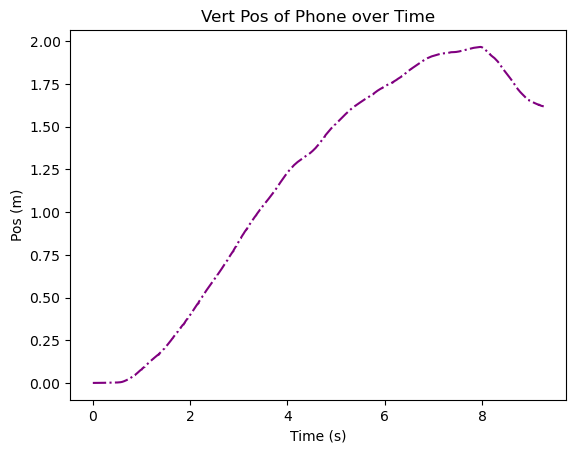

In [47]:
#height1.plot(y='z_pos_m')
plt.plot(height1['time'], height1['z_pos_m'], color='purple', linestyle='-.')
plt.xlabel('Time (s)')
plt.ylabel('Pos (m)')
plt.title('Vert Pos of Phone over Time')
#plt.text(900, 1.5, 'Height of Iris')       #Tried to add an annotation showing where the correct height was, but it didn't work.

plt.show()

In [17]:
max_height1= height1['z_pos_m'].max()
max_height1

1.96724196472291

In [18]:
A_height= height1.iloc[1100]
# this time stamp more accurately reflects when the phone was at the top of her head, and the height is more accurate as well. 
A_height1=A_height['z_pos_m']
A_height1

# So Iris's height was calculated to be about 1.7 m using this data. 

1.7020120686245281

In [19]:
#Moving on to the second measurement: (All methods are the same as those for the first data set)
#    Some intermediate steps (like showing the df after each new column) have been omitted for clarity/concision. 

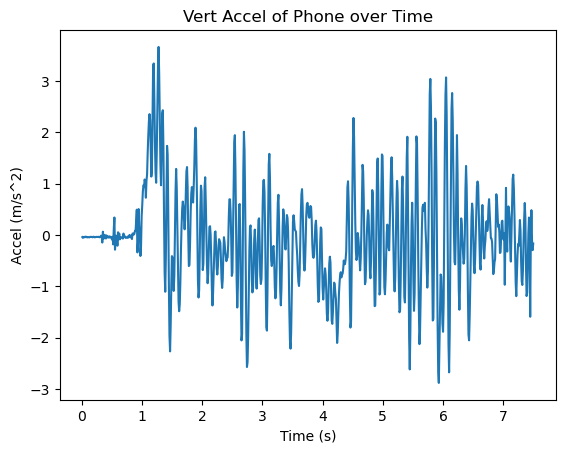

In [20]:
plt.plot(height2['Time (s)'], height2['Linear Acceleration z (m/s^2)'])
plt.xlabel('Time (s)')
plt.ylabel('Accel (m/s^2)')
plt.title('Vert Accel of Phone over Time')

plt.show()

#This is the unadjusted data

In [21]:
z_baseline2= height2['Linear Acceleration z (m/s^2)'].iloc[:100].mean()
z_baseline2

# The row number used for the .iloc was found by plotting the data using .plot() first

-0.017464644975511007

In [22]:
height2['accel_z']=height2['Linear Acceleration z (m/s^2)'] - z_baseline2

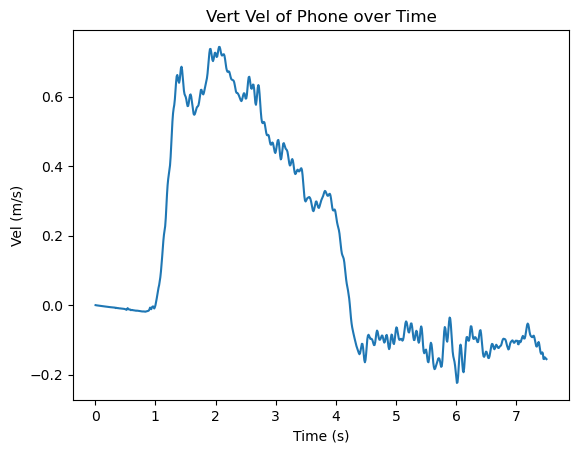

In [23]:
dt2= height2['Time (s)'].iloc[-1] / height2.shape[0]
height2['z_vel_ms']= height2['accel_z'].cumsum()*dt2

plt.plot(height2['Time (s)'], height2['z_vel_ms'])
plt.xlabel('Time (s)')
plt.ylabel('Vel (m/s)')
plt.title('Vert Vel of Phone over Time')

plt.show()

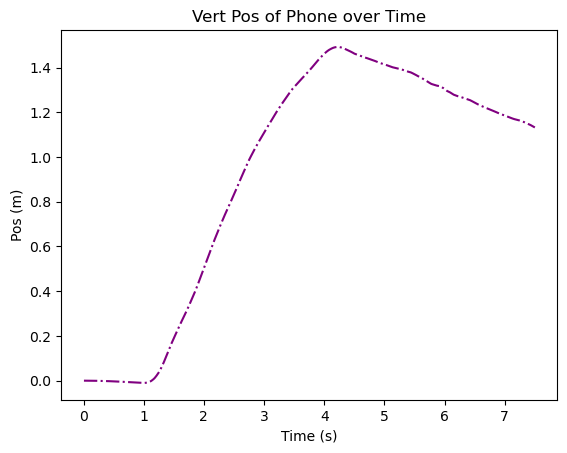

In [24]:
height2['z_pos_m']= height2['z_vel_ms'].cumsum()*dt2

plt.plot(height2['Time (s)'], height2['z_pos_m'], color='purple', linestyle='-.')
plt.xlabel('Time (s)')
plt.ylabel('Pos (m)')
plt.title('Vert Pos of Phone over Time')

plt.show()

In [25]:
max_height2= height2['z_pos_m'].max()
max_height2

1.492446156368399

In [26]:
A_height2= max_height2
A_height2

# Iris's height was calculated to be about 1.5 m this time. 

1.492446156368399

In [27]:
# Measurement 3: (Again, all methods/steps are the same)

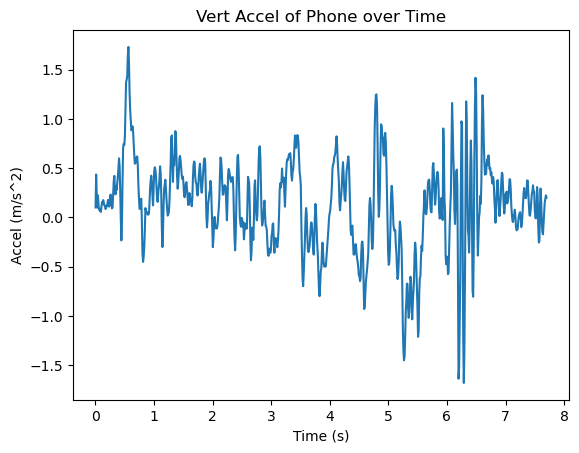

In [28]:
plt.plot(height3['Time (s)'], height3['Linear Acceleration z (m/s^2)'])
plt.xlabel('Time (s)')
plt.ylabel('Accel (m/s^2)')
plt.title('Vert Accel of Phone over Time')

plt.show()

In [29]:
z_baseline3= height3['Linear Acceleration z (m/s^2)'].iloc[:25].mean()

height3['accel_z']= height3['Linear Acceleration z (m/s^2)'] - z_baseline3

In [30]:
dt3= height3['Time (s)'].iloc[-1] / height3.shape[0]

height3['z_vel_ms']= height3['accel_z'].cumsum()*dt3

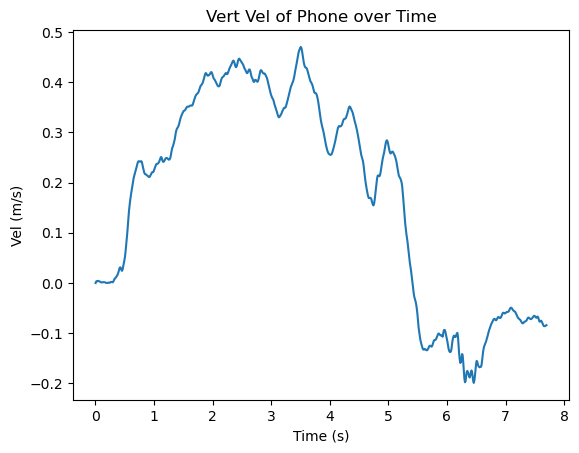

In [31]:
plt.plot(height3['Time (s)'], height3['z_vel_ms'])
plt.xlabel('Time (s)')
plt.ylabel('Vel (m/s)')
plt.title('Vert Vel of Phone over Time')

plt.show()

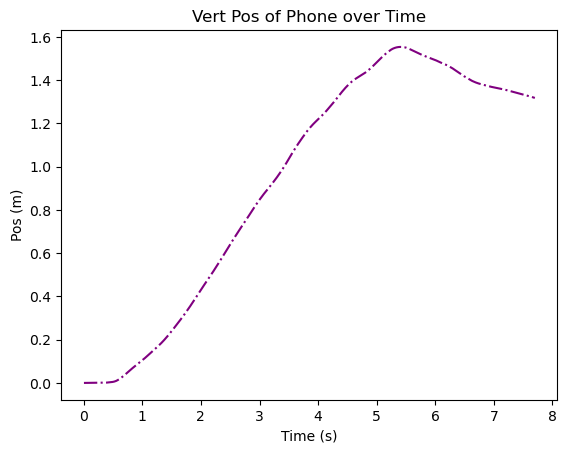

In [32]:
height3['z_pos_m']= height3['z_vel_ms'].cumsum()*dt3

plt.plot(height3['Time (s)'], height3['z_pos_m'], color='purple', linestyle='-.')
plt.xlabel('Time (s)')
plt.ylabel('Pos (m)')
plt.title('Vert Pos of Phone over Time')

plt.show()

In [33]:
max_height3= height3['z_pos_m'].max()
A_height3= max_height3
A_height3

# Iris's height was calculated to be about 1.6 m.

1.5534076868900997

In [34]:
A_height= (A_height1+A_height2+A_height3)/3
A_height

# The measurements do not agree very well with each other, although the heights from 2 and 3 are relatively close 
#    to eachother (although both too short). 

#So the average of the measurements puts Iris at about 5'2" (1.58 m), which is not a great estimate, 
#     but the error comes from the original measurements not the analysis.

1.5826219706276756

**ABOVE AND BEYOND: 

Graphing raw data to estimate average amount of hand-shakiness in each direction.

Because this data includes raw acceleration, the resulting graphs represent real time mappings of the persons hand in a given direction.

In [48]:
concatenated = pd.concat((height1, height2, height3))

Text(0.5, 1.0, 'Hand Shakiness on X axis')

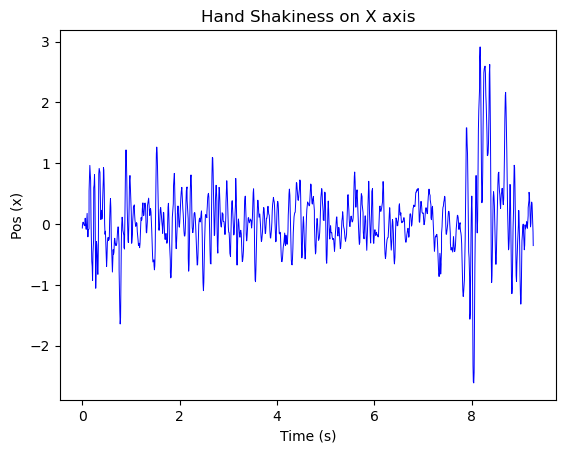

In [49]:
plt.plot(concatenated['time'], concatenated['ax (m/s^2)'], color='blue',linewidth = .7, linestyle='-')
plt.xlabel('Time (s)')
plt.ylabel('Pos (x)')
plt.title('Hand Shakiness on X axis')

Text(0.5, 1.0, 'Hand Shakiness on Y axis')

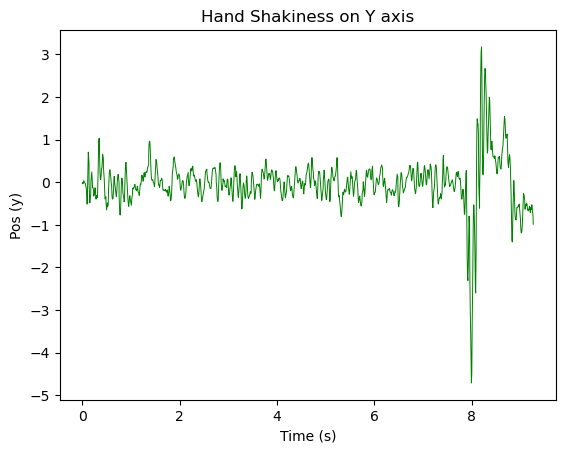

In [50]:
plt.plot(concatenated['time'], concatenated['ay (m/s^2)'], color='green',linewidth = .7, linestyle='-')
plt.xlabel('Time (s)')
plt.ylabel('Pos (y)')
plt.title('Hand Shakiness on Y axis')

Text(0.5, 1.0, 'Hand Shakiness on Z axis')

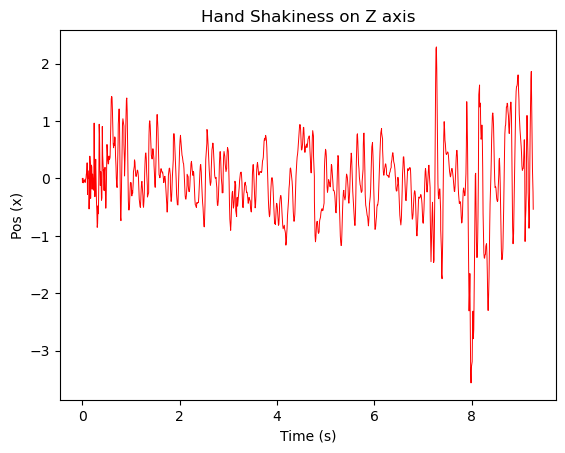

In [51]:
plt.plot(concatenated['time'], concatenated['az (m/s^2)'], color='red',linewidth = .7, linestyle='-')
plt.xlabel('Time (s)')
plt.ylabel('Pos (x)')
plt.title('Hand Shakiness on Z axis')

In [ ]:
#The preceding graphs depict more stable movement from seconds 0 - 7, after which large sways in either direction occur
#   stemming from unstable hands due to the phone being held over the person's head

# PART 2
Both Physics Toolbox Sensor Suite and Phyphox have a wide range of sensors that cover everything from motion to sound/accoustics to light to magnetism.

For more on the different kinds of sensors your phone has, check out, "All the sensors in your smartphone, and how they work"Links to an external site. (Gizmodo, Neild).

Pick at least one additional sensor and conduct some experiments. You may use the resources at Physics ToolboxLinks to an external site. or  PhyPhox Links to an external site.for inspiration.

At minimum, be sure to include the following:

Measurement: Use your phone and a sensor of your choice to collect data on something interesting.
    
Data management: Describe the app used and the process of getting the data from the phone to your Jupyter environment
    
Data wrangling: Explain what you did to adjust, clean, and otherwise prepare the data for the analysis
    
Visualization: Use matplotlib to visualize some dimension of the data, describe the graph and whether it seems to make sense
    
Analysis: Use at least one function (recall Table 5.8Links to an external site.) to analyze the data, and explain the analysis

In [ ]:
#We are using data from the Audio Amplitude section of our app Phyphox and we are collecting data on the amplitude of 
#   one of our group member's voice. We measured the amplitude in a quiet environment and set the sound pressure level in
#      the app to 60 dB as a reference. The app determines the amplitude by comparing it to a sound with known amplitude. 

In [35]:
Amplitudes= pd.read_csv("Amplitudes.csv")
Amplitudes 

,Time (s),Sound pressure level (dB)
0,0.000000,NaN
1,0.329744,NaN
2,0.434996,-56.135071
3,0.539486,-51.386104
4,0.648051,-54.080979
...,...,...
1583,171.882544,-55.221633
1584,171.993463,-53.585258
1585,172.099041,-52.756940
1586,172.210115,-51.702375


In [36]:
#We collected the data on the app and then converted it to a cvs file and named the file Amplitudes and uploaded it in
#    our Jupyter Notebook file so we can process it. 

In [37]:
Amplitudes.describe()

,Time (s),Sound pressure level (dB)
count,1588.000000,1586.000000
mean,86.239163,-49.603426
std,49.825117,4.219166
min,0.000000,-57.251311
25%,43.079824,-52.540430
50%,85.932580,-50.698558
75%,129.462296,-47.673784
max,172.315937,-30.085866


<AxesSubplot:>

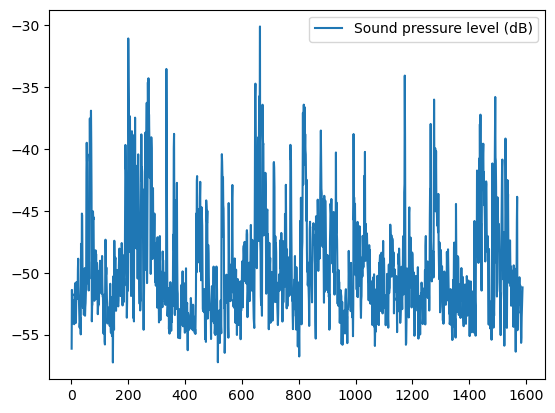

In [38]:
Amplitudes.plot(y="Sound pressure level (dB)")

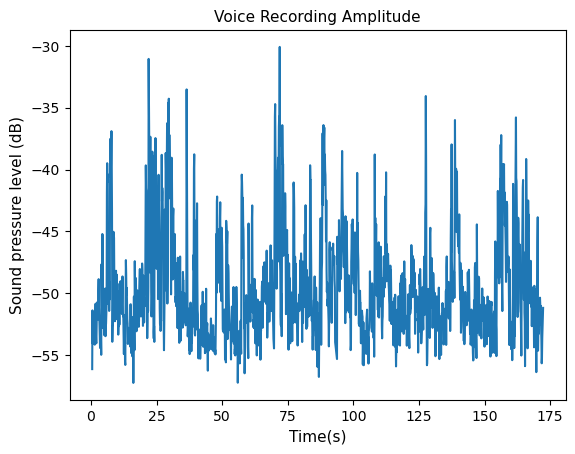

In [39]:
plt.plot (Amplitudes['Time (s)'], Amplitudes['Sound pressure level (dB)'])
plt.xlabel('Time(s)', fontsize=11)
plt.ylabel('Sound pressure level (dB)', fontsize=11)
plt.title("Voice Recording Amplitude", fontsize=11)
plt.plot(linestyle='-')
plt.show()

In [40]:
#We visualized our data using matplotlib to observe changes of amplitude over time. We set Amplitude measured db as 
#    the y variable and time measured in seconds. The mean of the Sound pressure level is -49.6dB and the variance is
#        4.219166. The maximum value of sound pressure is -30.085866 and the maximum is -57.251311.  
#            There is no visible trend in the graph and there is a lot of flunctuations. 

In [41]:
#Above & Beyond 
Amplitudes.max()

Time (s)                     172.315937
Sound pressure level (dB)    -30.085866
dtype: float64

In [42]:
Amplitudes.idxmax()

Time (s)                     1587
Sound pressure level (dB)     664
dtype: int64

In [43]:
#We found the maximum value of our graph for both time and sound pressure level. The data type of float64. 
#And then we found the index in which the highest sound pressure level occurs. The data type of int64. 

In [44]:
Amplitudes.min()

Time (s)                      0.000000
Sound pressure level (dB)   -57.251311
dtype: float64

In [45]:
Amplitudes.idxmin()

Time (s)                       0
Sound pressure level (dB)    147
dtype: int64

In [ ]:
#We found the minimum value of our graph for both time and sound pressure level. The data type of float64. 
#And then we found the index in which the lowest Sound pressure level occurs. The data type of int64. 